## Spending Analysis Notebook

This Jupyter Notebook provides an analysis of spending data, allowing you to gain insights into your financial transactions. 

 >  Please note that the dataset used in this analysis is generated with random timestamps, dates, and monetary values. While the patterns and trends observed may not reflect real-world spending habits, this analysis serves as an exercise to demonstrate the capabilities of data analysis techniques.

Feel free to modify the code and customize the analysis based on your needs or replace the dataset with your own spending data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot



data = pd.read_csv('spending.csv')

data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

In [2]:
total_spent = data['amount'].sum()
print(f'Total amount spent over the time period: £{total_spent}')

num_days = (pd.to_datetime(data['date'], format='%d-%m-%Y').max() - pd.to_datetime(data['date'], format='%d-%m-%Y').min()).days + 1
print(f'Number of days in the dataset: {num_days} days')

Total amount spent over the time period: £8852
Number of days in the dataset: 62 days


In [3]:
total_amount_spent_per_category = data.groupby('category')['amount'].sum()

for category, amount in total_amount_spent_per_category.items():
    print(f'{category}: £{amount}')

Entertainment: £1614
Food & Drink: £1053
Groceries: £1186
Restaurant: £1817
Shopping: £2765
Transport: £417


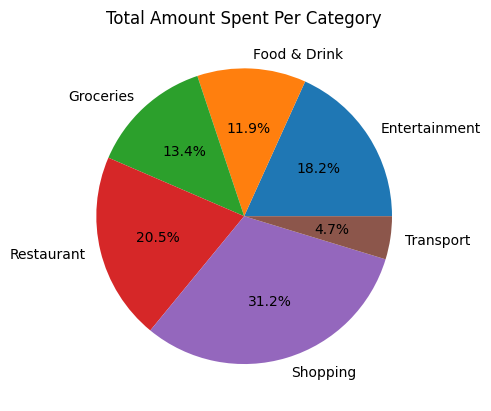

In [4]:
fig, ax = plt.subplots()
ax.pie(total_amount_spent_per_category, labels = total_amount_spent_per_category.index, autopct='%1.1f%%')
ax.set_title('Total Amount Spent Per Category')

plt.show()

In [5]:
method_counts = data['method'].value_counts()
most_common_method = method_counts.idxmax()
print(f'The most common payment method was: {most_common_method}')

The most common payment method was: Debit Card


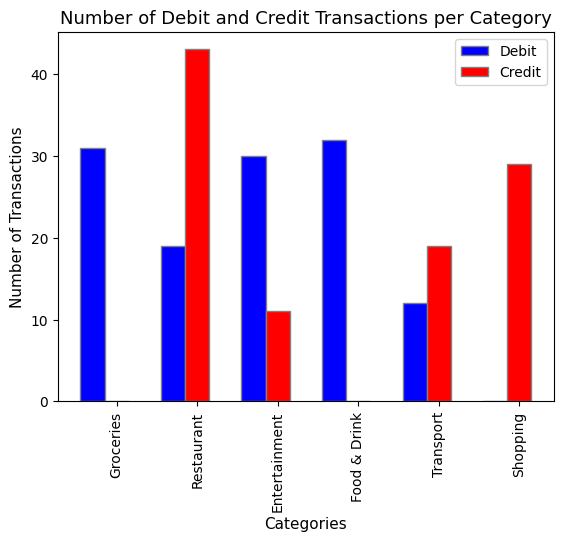

In [6]:
categories = data['category'].unique()
debit_counts = []
credit_counts = []

for category in categories:
    debit_rows = data[(data['category'] == category) & (data['method'] == 'Debit Card')]
    credit_rows = data[(data['category'] == category) & (data['method'] == 'Credit Card')]

    debit_count = len(debit_rows)
    credit_count = len(credit_rows)

    debit_counts.append(debit_count)
    credit_counts.append(credit_count)

barWidth = 0.3

r1 = np.arange(len(debit_counts))
r2 = [x + barWidth for x in r1]

plt.bar(r1, debit_counts, color='b', width=barWidth, edgecolor='grey', label='Debit')
plt.bar(r2, credit_counts, color='r', width=barWidth, edgecolor='grey', label='Credit')

plt.xlabel('Categories', fontsize=11)
plt.xticks([r + barWidth for r in range(len(debit_counts))], categories, rotation=90)
plt.ylabel('Number of Transactions', fontsize=11)

plt.title('Number of Debit and Credit Transactions per Category', fontsize=13)

plt.legend()
plt.show()

In [7]:
most_expensive_purchase = data['amount'].max()
expensive_purchase_details = data[data['amount'] == most_expensive_purchase]
print('Most expensive purchase details:')
print(expensive_purchase_details)

Most expensive purchase details:
          date   time  category        event  amount       method
221 2023-04-22  14:30  Shopping  New clothes     180  Credit Card


In [8]:
least_expensive_purchase = data['amount'].min()
least_expensive_purchase_details = data[data['amount'] == least_expensive_purchase]
print('Least expensive purchase details:')
print(least_expensive_purchase_details)

Least expensive purchase details:
         date  time   category       event  amount      method
4  2023-06-20  9:00  Transport  Bus ticket       2  Debit Card
26 2023-06-14  9:00  Transport  Bus ticket       2  Debit Card


In [9]:
daily_spending = data.groupby('date')['amount'].sum()

most_expensive_day = daily_spending.idxmax()
least_expensive_day = daily_spending.idxmin()

print(f'Most expensive day: {most_expensive_day}, spent: £{daily_spending[most_expensive_day]}')
print(f'Least expensive day: {least_expensive_day}, spent: £{daily_spending[least_expensive_day]}')

Most expensive day: 2023-04-22 00:00:00, spent: £330
Least expensive day: 2023-05-05 00:00:00, spent: £54


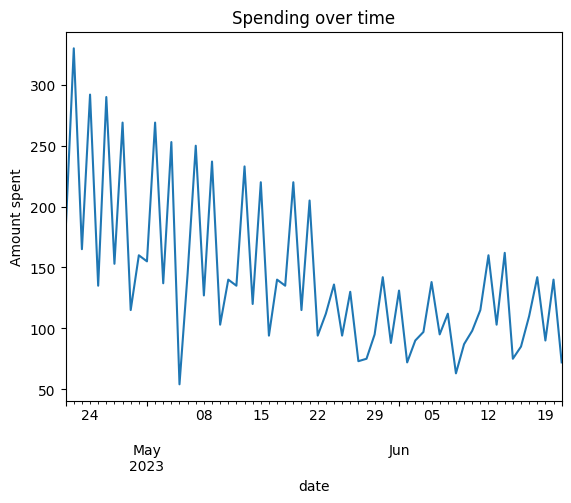

In [10]:
spending_over_time = data.groupby('date')['amount'].sum()
spending_over_time.plot(kind='line')
plt.ylabel('Amount spent')
plt.title('Spending over time')
plt.show()

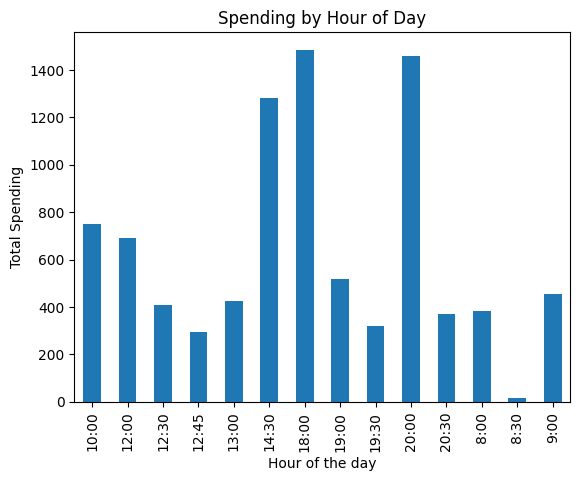

In [11]:
spending_by_hour = data.groupby('time')['amount'].sum()

spending_by_hour.plot(kind='bar')
plt.xlabel('Hour of the day')
plt.ylabel('Total Spending')
plt.title('Spending by Hour of Day')
plt.show()


In [12]:
data['date'] = pd.to_datetime(data['date'])

grouped = data.groupby([data['date'].dt.date, 'category'])['amount'].sum().reset_index()

average_daily_spending = grouped.groupby('category')['amount'].mean().reset_index()

print(average_daily_spending)


        category     amount
0  Entertainment  39.365854
1   Food & Drink  32.906250
2      Groceries  38.258065
3     Restaurant  29.306452
4       Shopping  95.344828
5      Transport  13.451613


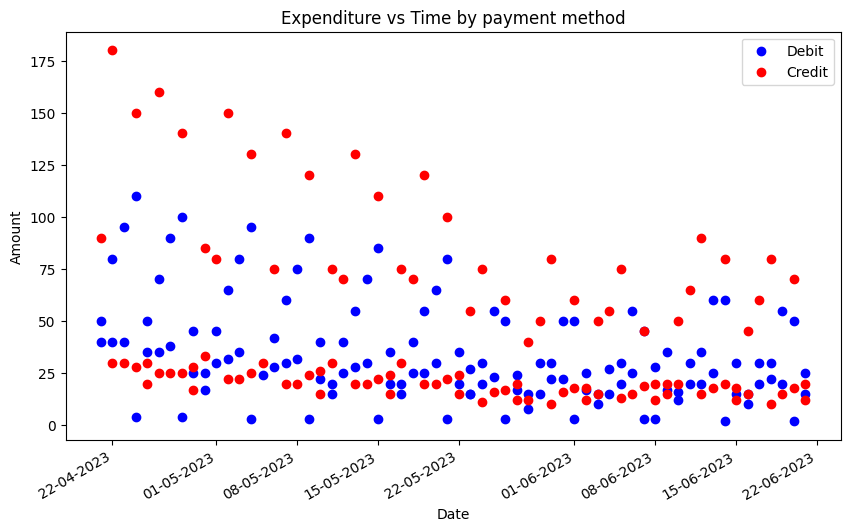

In [13]:
data['date'] = pd.to_datetime(data['date'])

data['amount'] = pd.to_numeric(data['amount'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(data[data['method'] == 'Debit Card']['date'], 
           data[data['method'] == 'Debit Card']['amount'], 
           color='blue', 
           label='Debit')

ax.scatter(data[data['method'] == 'Credit Card']['date'], 
           data[data['method'] == 'Credit Card']['amount'], 
           color='red', 
           label='Credit')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

plt.title('Expenditure vs Time by payment method')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()

plt.show()

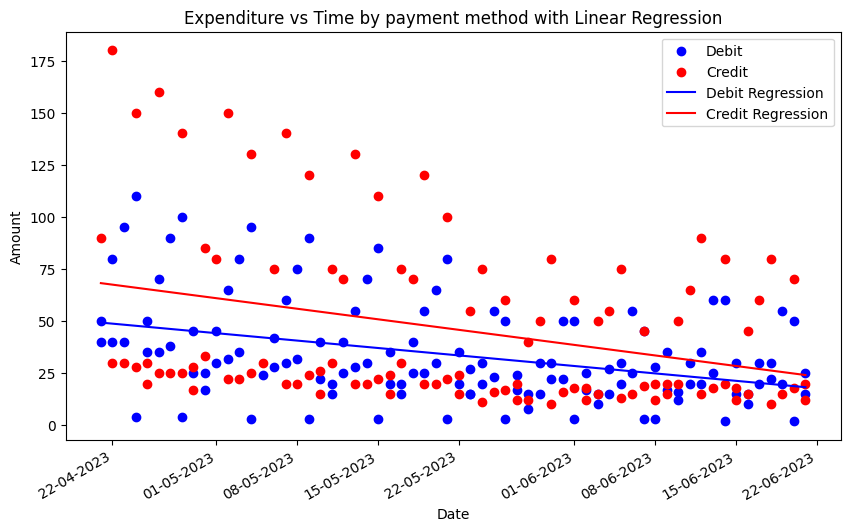

In [14]:
# Convert 'date' to ordinal values for regression analysis
data['date_ordinal'] = data['date'].apply(lambda x: x.toordinal())

# Separate debit and credit transactions
debit_data = data[data['method'] == 'Debit Card']
credit_data = data[data['method'] == 'Credit Card']

# Create a new figure and axes for linear regression plot
fig, ax = plt.subplots(figsize=(10, 6))

# Perform linear regression on debit transactions
debit_reg = LinearRegression()
debit_reg.fit(debit_data['date_ordinal'].values.reshape(-1, 1), debit_data['amount'].values.reshape(-1, 1))
debit_reg_line = debit_reg.predict(debit_data['date_ordinal'].values.reshape(-1, 1))

# Perform linear regression on credit transactions
credit_reg = LinearRegression()
credit_reg.fit(credit_data['date_ordinal'].values.reshape(-1, 1), credit_data['amount'].values.reshape(-1, 1))
credit_reg_line = credit_reg.predict(credit_data['date_ordinal'].values.reshape(-1, 1))

# Plot scatter plot with debit transactions
ax.scatter(debit_data['date'], debit_data['amount'], color='blue', label='Debit')

# Plot scatter plot with credit transactions
ax.scatter(credit_data['date'], credit_data['amount'], color='red', label='Credit')

# Plot linear regression line for debit transaction
ax.plot(debit_data['date'], debit_reg_line, color='blue', label='Debit Regression')

ax.plot(credit_data['date'], credit_reg_line, color='red', label='Credit Regression')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

ax.set_title('Expenditure vs Time by payment method with Linear Regression')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')
ax.legend()

plt.show()